In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import os

In [2]:
from chromalab.observer import Observer, Cone, transformToChromaticity, getHeringMatrix
from chromalab.spectra import Spectra, Illuminant, convert_refs_to_spectras, convert_refs_to_rgbs
from chromalab.maxbasis import MaxBasis
from chromalab.inks import InkGamut
from chromalab.visualizer import PSWrapper, DisplayBasisType, exportAndPlay, easeFunction
from chromalab.animation import Animation

objc[24205]: Class GLFWApplicationDelegate is implemented in both /Users/jessicalee/anaconda3/envs/chromalab/lib/python3.11/site-packages/open3d/cpu/pybind.cpython-311-darwin.so (0x2aa386e28) and /Users/jessicalee/anaconda3/envs/chromalab/lib/python3.11/site-packages/polyscope_bindings.cpython-311-darwin.so (0x2c4cc2ea0). One of the two will be used. Which one is undefined.
objc[24205]: Class GLFWWindowDelegate is implemented in both /Users/jessicalee/anaconda3/envs/chromalab/lib/python3.11/site-packages/open3d/cpu/pybind.cpython-311-darwin.so (0x2aa386db0) and /Users/jessicalee/anaconda3/envs/chromalab/lib/python3.11/site-packages/polyscope_bindings.cpython-311-darwin.so (0x2c4cc2ec8). One of the two will be used. Which one is undefined.
objc[24205]: Class GLFWContentView is implemented in both /Users/jessicalee/anaconda3/envs/chromalab/lib/python3.11/site-packages/open3d/cpu/pybind.cpython-311-darwin.so (0x2aa386e50) and /Users/jessicalee/anaconda3/envs/chromalab/lib/python3.11/site-

In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib ipympl

In [22]:
wavelengths = np.arange(400, 710, 5)
d65 = Illuminant.get("D65")

In [24]:
tetrachromat = Observer.tetrachromat(wavelengths=wavelengths, illuminant=d65, verbose=True) 
maxbasis = MaxBasis(tetrachromat, verbose=True)
# viz = PSWrapper(tetrachromat, maxbasis, itemsToDisplay=PSWrapper.ItemsToDisplay.BOTH, displayBasis=DisplayBasisType.MAXBASIS, verbose=True) 

100%|██████████| 59/59 [00:03<00:00, 16.09it/s]


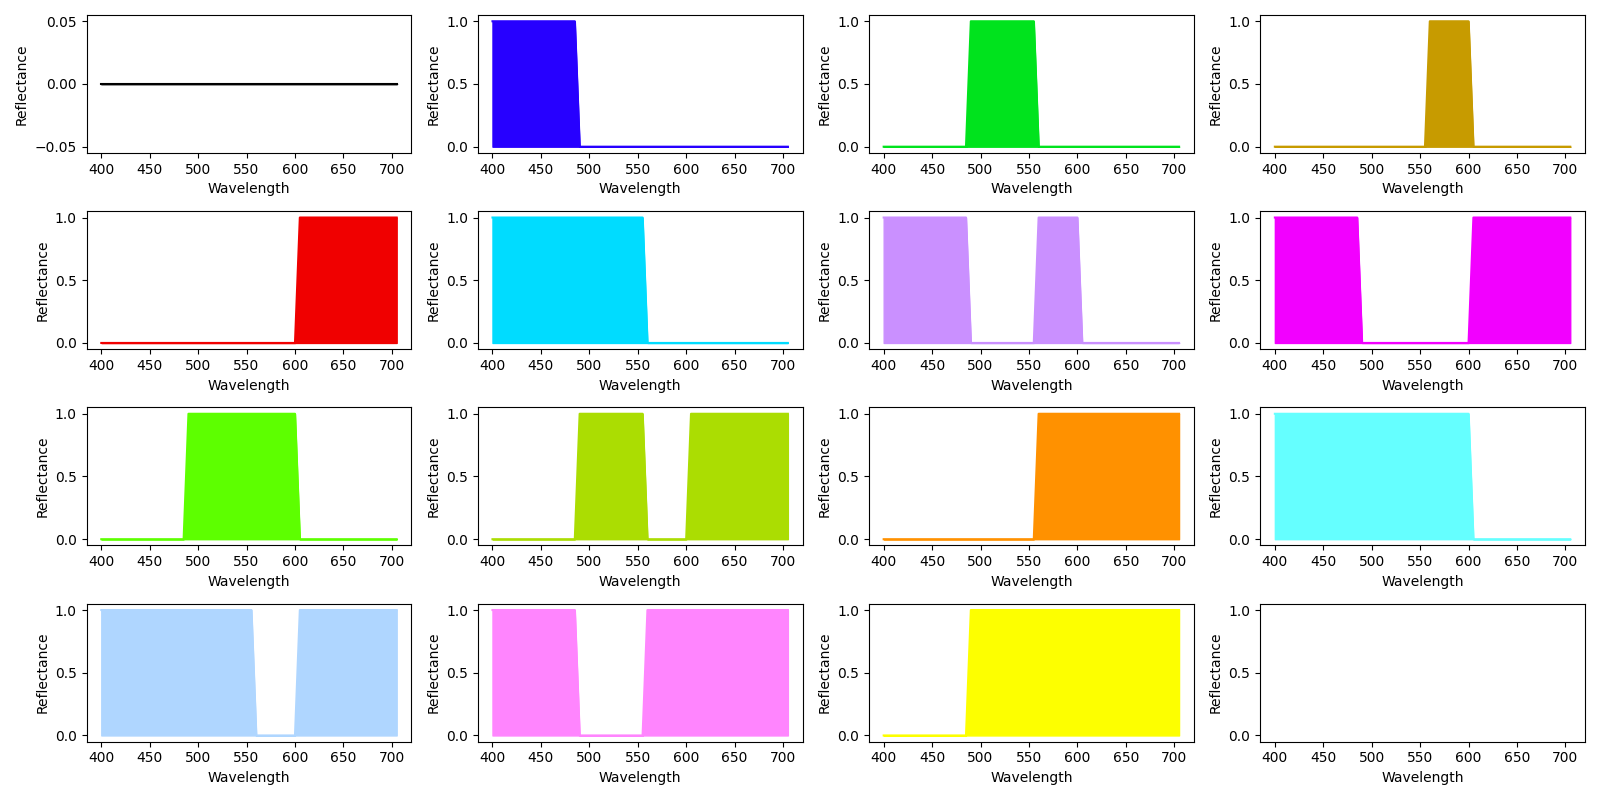

: 

In [25]:
# Before Start
refs, discrete_points, rgbs, lines = maxbasis.getDiscreteRepresentation()
fig, axs = plt.subplots(4, 4, figsize=(16, 8))

for i in range(4):
    for j in range(4):
        axs[i, j].plot(wavelengths, refs[i*4+j].data, c=rgbs[i*4 + j])
        axs[i, j].fill_between(wavelengths, refs[i*4+j].data, color=rgbs[i*4 + j])
        axs[i, j].set_xlabel('Wavelength')
        axs[i, j].set_ylabel('Reflectance')
        # axs[i, j].set_title(f'Ref {i*4+j}')

plt.tight_layout()
plt.show()

In [7]:
# Polyscope settings
viz.ps.set_ground_plane_mode("none")

# render all objects
viz.renderObjectsPS(mesh_alpha=0.8, lattice_alpha=1)
viz.renderQArrow()

# transform to correct dir
mat = viz._getTransformQUpDir()
viz.ps.get_surface_mesh("mesh").set_transform(mat)
viz.ps.get_surface_mesh("lattice").set_transform(mat)
viz.ps.get_surface_mesh("qarrow").set_transform(mat)

In [8]:
viz.renderCube('cube', side_length=2)

['cube']

In [9]:
names = ["mesh", "lattice", "qarrow", "cube"]

In [10]:
# animation "macros"
frames_per_sec = 30
short_frames = 30
medium_frames = 60
long_frames = 90

rots_per_sec = 1/3
rot_frames = int(frames_per_sec/rots_per_sec)

r = 4
theta = 65
phi = 0

dirname = "./outputs/cube-map-asset"
offset = 0

In [11]:
os.makedirs(dirname, exist_ok=True)

In [12]:
# 4. Show the Intersection with a Line to get an Ishihara Test, And then the Intersection with a Circle for CubeMap
types =  ['surface_mesh', 'surface_mesh', 'surface_mesh', 'surface_mesh']
map_name_type = {name:typ for name, typ in zip(names, types)}

anim = Animation(viz, map_name_type)
set_enabled = anim.SetEnabledFn()
anim.ResetTransparencies()

In [13]:
# 1. Rotate Around Z
phi = 90
set_enabled([True, False, True, False])
rotAroundZ, phi = anim.RotateAroundZ(medium_frames, r, theta, [0, phi])
offset = viz.renderScreenshots(rotAroundZ, dirname, medium_frames, offset)

In [14]:
# 2. Fade in Ideal and Selected Primaries, with Gamut
set_enabled([True, False, True, True])
fadeInCube = anim.FadeIn("cube", medium_frames, [0.2, 0.5])
rotAroundZ, phi  = anim.RotateAroundZ(medium_frames, r, theta, [phi, phi + 90])

fadeInCubeWhileRotate = Animation.concatFns([fadeInCube, rotAroundZ])
offset = viz.renderScreenshots(fadeInCubeWhileRotate, dirname, medium_frames, offset)

In [15]:
Rot45Speed, phi = anim.RotateAroundZ(medium_frames + medium_frames, r, theta, [phi, phi + 90 + 90])
offset = viz.renderScreenshots(Rot45Speed, dirname, medium_frames + medium_frames, offset)

In [16]:
exportAndPlay(dirname)

ffmpeg version 7.0.1 Copyright (c) 2000-2024 the FFmpeg developers
  built with Apple clang version 15.0.0 (clang-1500.1.0.2.5)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/7.0.1 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags='-Wl,-ld_classic' --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libharfbuzz --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libssh --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --enable-libfreetype --enable-frei0r --enable-libass --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libspeex 